# Load All Data

In [1]:
import numpy as np
import pandas as pd
Data_Path='/Users/jieyuwang/Desktop/Wikileak_Proj/Model_dataset/final_All_countries_ng'
All_neg_data=pd.read_json(Data_Path)

In [2]:
All_neg_data.head(10)

,Content,date,dummy_lable,lg_rt_features,num_lable
0,\nRef: Hanoi 2175 \n \n1. (SBU) Summary: Vi...,20031107,0,[-0.0003904 -0.00105284 -0.00381148 -0.004397...,-0.001046
1,\n1. Embassy grants country clearance to Tho...,20040729,1,[ 0.00065909 -0.00028235 -0.00324443 0.003840...,-0.000880
10,B. STATE 21700 \n C. CANBERRA 322 \n ...,20050222,0,[-0.00047151 0.00201716 -0.00077214 0.001911...,-0.003435
100,\n1. (SBU) Embassy welcomes and grants count...,20061025,0,[ 2.43085000e-03 2.90790000e-04 -6.7881300...,-0.001088
1000,"\n1. On March 27, 2006, Embassy delivered to...",20060329,1,[ 0.00529926 -0.00564014 -0.00332254 -0.003348...,-0.001134
10000,\n1. (SBU) The Indian parliament will hold i...,20080827,0,['-0.001444897' '0.000413319' '0' '0.000103268...,-0.001193
10001,B. B) KOLKATA 238 \n C. C) KOLKATA 00...,20080829,1,['0' '0.000103268' '0.002881585' '0.002148711'...,-0.003998
10002,\n1. (U) Below is a compilation of politica...,20080829,1,['0' '0.000103268' '0.002881585' '0.002148711'...,-0.003998
10003,Reasons 1.4 (B and D) \n \n1.(C) SUMMARY: In ...,20080829,1,['0' '0.000103268' '0.002881585' '0.002148711'...,-0.003998
10004,\n1. (SBU) Summary: After years of speculat...,20080829,1,['0' '0.000103268' '0.002881585' '0.002148711'...,-0.003998


# Fit and transform tf-idf Vectorizer to all content 

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(binary = True, ngram_range = (1, 2) )
X_train_tfid=tfidf_vectorizer.fit_transform(All_neg_data["Content"])

# Build Random Forest Model and Display feature importance

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfid, All_neg_data["dummy_lable"], test_size=0.15, random_state=44)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=15, verbose=100)
clf.fit(X_train, y_train)

building tree 1 of 15
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.7min remaining:    0.0s
building tree 2 of 15
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.2min remaining:    0.0s
building tree 3 of 15
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.5min remaining:    0.0s
building tree 4 of 15
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 13.9min remaining:    0.0s
building tree 5 of 15
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.5min remaining:    0.0s
building tree 6 of 15
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 21.3min remaining:    0.0s
building tree 7 of 15
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 24.8min remaining:    0.0s
building tree 8 of 15
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 28.8min remaining:    0.0s
building tree 9 of 15
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 32.2min remaining:    0.0s
building tree 10 of 15
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 35.6mi

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=100,
            warm_start=False)

In [6]:
feature_list=tfidf_vectorizer.get_feature_names()

In [19]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1][0:15]

In [20]:
feature_list_20=[]
for index in indices[0:15]:
    feature_name=feature_list[index].replace(' ', ' \n ')
    feature_list_20.append(feature_name)

<IPython.core.display.Javascript object>


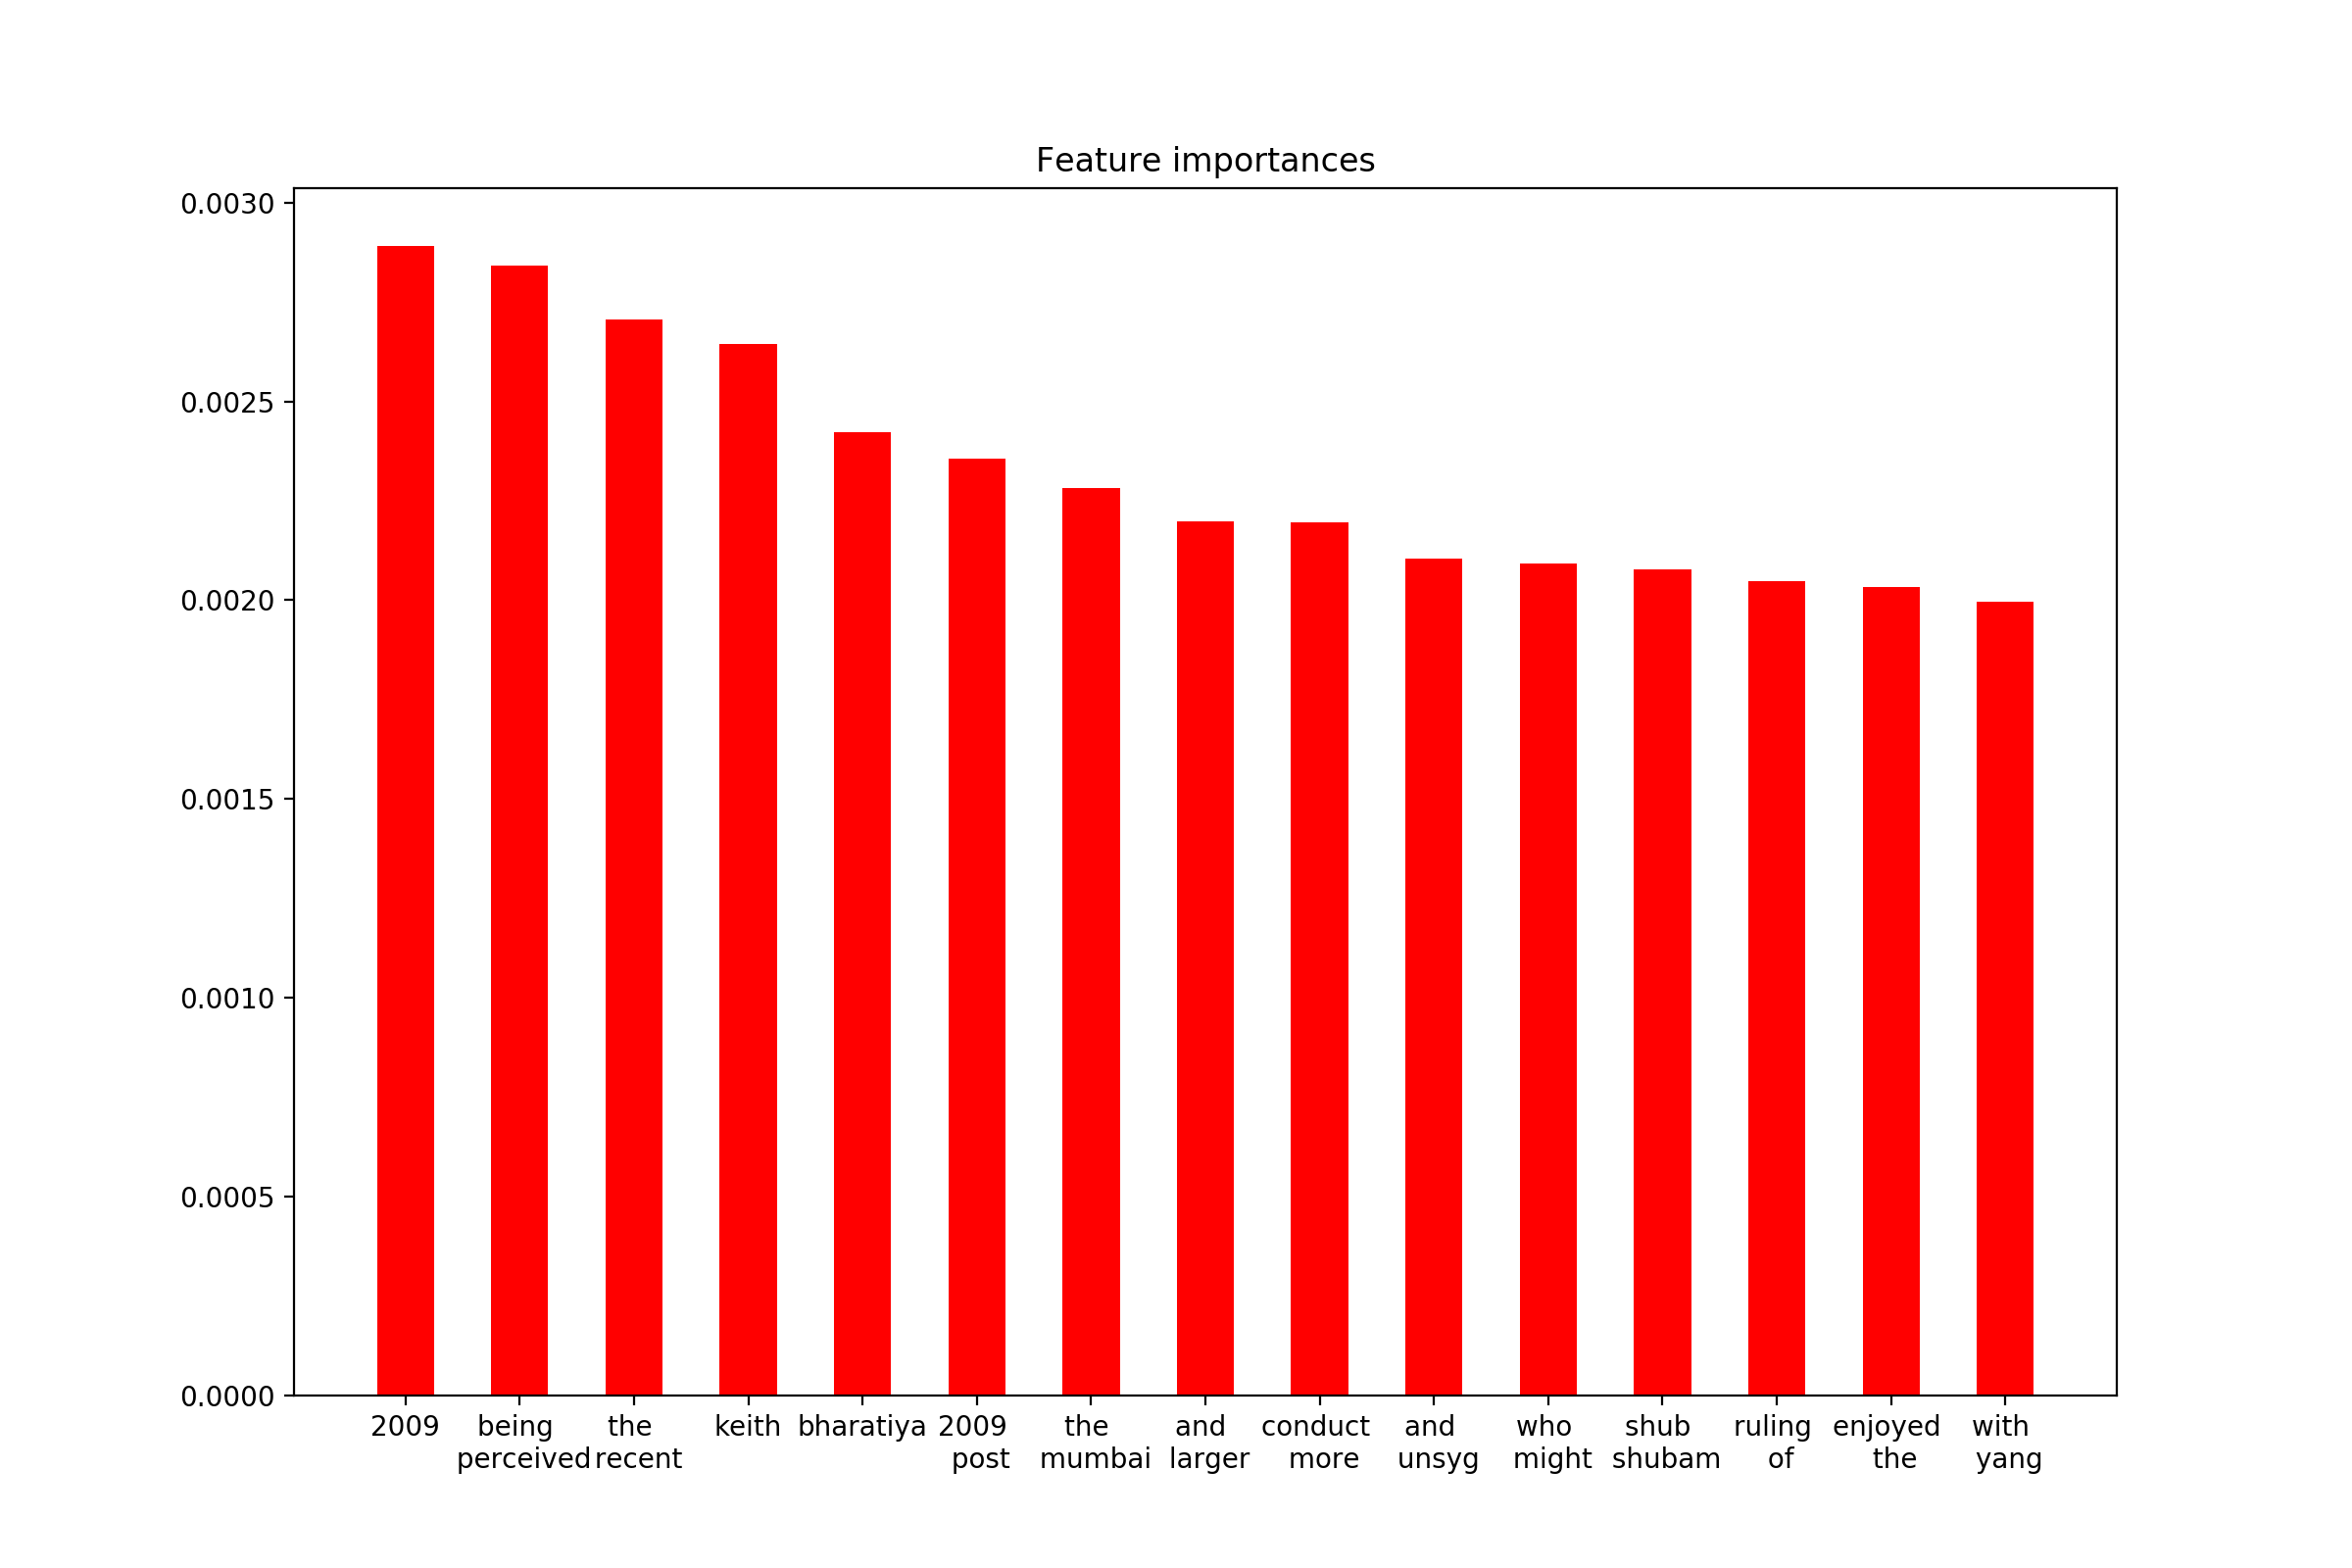

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(0, 15), importances[indices],
       color="r",  align="center", width=0.5)
plt.xticks(range(0, 15), feature_list_20)
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.show()